<h1>Welcome to my Kernel</h1>

### I am learning about some automated tools to Machine Learning and I will try to implement some of them on this  Kernel.
<br> <i>*English is not my first language, sorry about any error</i>
<h1>Overview</h1>
There are 1460 instances of training data and 1460 of test data. Total number of attributes equals 81, of which 36 is quantitative, 43 categorical + Id and SalePrice.<br>
<br>
Quantitative: <i>1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold</i><br>
<br>




Qualitative: <i>Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,</i>



<h2>I will do some exploration trough  the House Prices, prerpocessing, modeling, set the feature engineering and TPOT model. <h2>

<b>If you like my Kernel, please give me your feedback and votes up =)  </b>

## Importing the librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import re

In [2]:
df_train = pd.read_csv("../input/train.csv")
df_test = pd.read_csv("../input/test.csv")

In [3]:
# Concatenating the dataframes in only one
df_train['set'] = 'train'
df_test['set'] = 'test'
df_test["SalePrice"] = np.nan
data = pd.concat([df_train, df_test], sort=True)

### Looking for missing values

In [4]:
#Looking  data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471


I will due with Nan's later, but by now I will fill with "miss"

In [5]:
for c in ['MiscFeature', 'Alley', 'Fence']:
    data[c].fillna('none', inplace=True)
    

Knowing the type of our data

In [6]:
numerical_feats = data.dtypes[data.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = data.dtypes[data.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  44


Nice, now let's explore our features;

## I will start exploring the categorical (object) variables

In [7]:
print(data.shape)

n = data.select_dtypes(include=object)
for column in n.columns:
    print(column, ':  ', data[column].unique())

(2919, 82)
Alley :   ['none' 'Grvl' 'Pave']
BldgType :   ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
BsmtCond :   ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure :   ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 :   ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2 :   ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtQual :   ['Gd' 'TA' 'Ex' nan 'Fa']
CentralAir :   ['Y' 'N']
Condition1 :   ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 :   ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Electrical :   ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
ExterCond :   ['TA' 'Gd' 'Fa' 'Po' 'Ex']
ExterQual :   ['Gd' 'TA' 'Ex' 'Fa']
Exterior1st :   ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' nan]
Exterior2nd :   ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBloc

> Very interesting. Let's plot all this values by our target value

In [8]:
## Let's see the distribuition of the categories: 
for category in list(categorical_feats):
    print('#'*35)    
    print('Distribuition of feature:', category)
    print(data[category].value_counts(normalize=True))
    print('#'*35)

###################################
Distribuition of feature: Alley
none    0.932169
Grvl    0.041110
Pave    0.026721
Name: Alley, dtype: float64
###################################
###################################
Distribuition of feature: BldgType
1Fam      0.830764
TwnhsE    0.077766
Duplex    0.037342
Twnhs     0.032888
2fmCon    0.021240
Name: BldgType, dtype: float64
###################################
###################################
Distribuition of feature: BsmtCond
TA    0.918576
Gd    0.043003
Fa    0.036658
Po    0.001762
Name: BsmtCond, dtype: float64
###################################
###################################
Distribuition of feature: BsmtExposure
No    0.671131
Av    0.147339
Gd    0.097286
Mn    0.084244
Name: BsmtExposure, dtype: float64
###################################
###################################
Distribuition of feature: BsmtFinType1
Unf    0.299648
GLQ    0.298944
ALQ    0.151056
Rec    0.101408
BLQ    0.094718
LwQ    0.054225
Name: Bsm

> Very interesting. We can see that almost all variables have high concentration in 1, 2 or 3 values.

## Now let's plot the categoricals and see the correlation by our target feature 

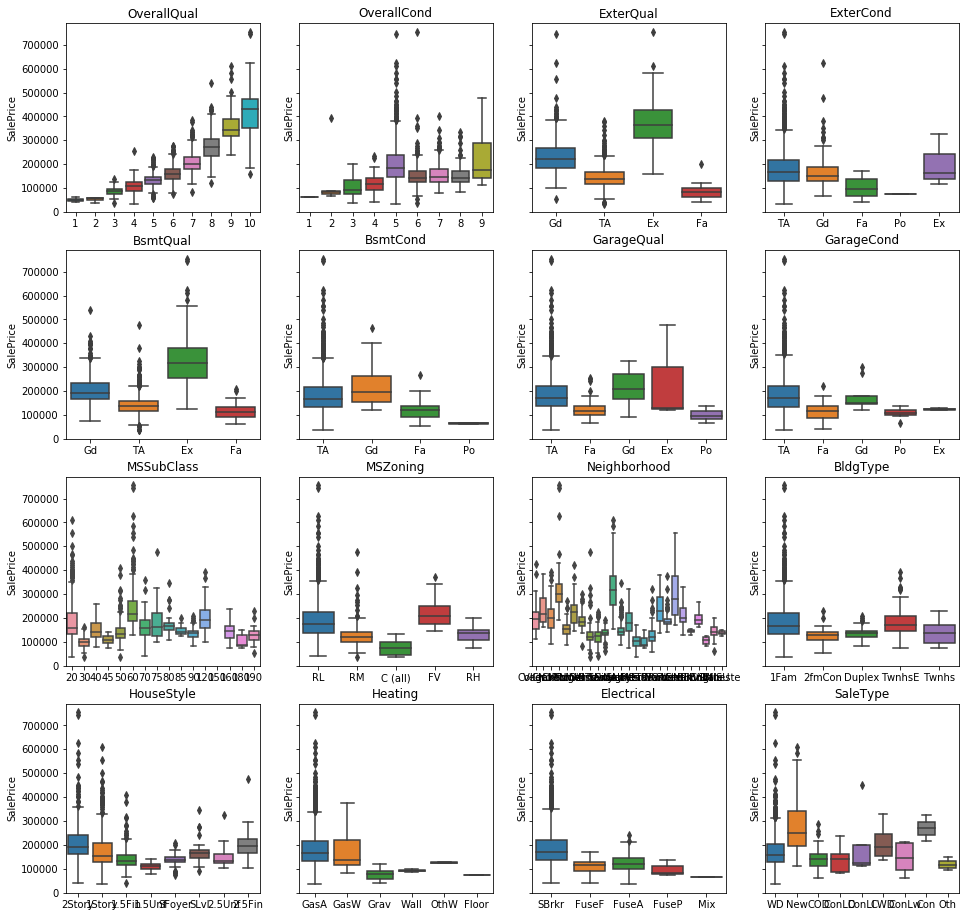

In [9]:
fig, axes = plt.subplots(ncols=4, nrows=4, 
                         figsize=(4 * 4, 4 * 4), sharey=True)

axes = np.ravel(axes)

cols = ['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual',
        'BsmtCond','GarageQual','GarageCond', 'MSSubClass','MSZoning',
        'Neighborhood','BldgType','HouseStyle','Heating','Electrical','SaleType']

for i, c in zip(np.arange(len(axes)), cols):
    ax = sns.boxplot(x=c, y='SalePrice', data=data, ax=axes[i])
    ax.set_title(c)
    ax.set_xlabel("")

> Very cool! We can see that some variables have influence on the SalePrice and the OverAllQuality seems the highest influence.

In [10]:
# to categorical feature
cols = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr",
        "KitchenAbvGr","MoSold","YrSold","YearBuilt","YearRemodAdd",
        "LowQualFinSF","GarageYrBlt"]

for c in cols:
    data[c] = data[c].astype(str)

# encode quality
# Ex(Excellent), Gd（Good）, TA（Typical/Average）, Fa（Fair）, Po（Poor）
cols = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']
for c in cols:
    data[c].fillna(0, inplace=True)
    data[c].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [11]:
def pair_features_to_dummies(df, col1, col2, prefix):
    d_1 = pd.get_dummies(df[col1].astype(str), prefix=prefix)
    d_2 = pd.get_dummies(df[col2].astype(str), prefix=prefix)
    for c in list(set(list(d_1.columns) + list(d_2.columns))):
        if not c in d_1.columns: d_1[c] = 0
        if not c in d_2.columns: d_2[c] = 0
    return (d_1 + d_2).clip(0, 1)

cond = pair_features_to_dummies(data,'Condition1','Condition2','Condition')
exterior = pair_features_to_dummies(data,'Exterior1st','Exterior2nd','Exterior')
bsmtftype = pair_features_to_dummies(data,'BsmtFinType1','BsmtFinType2','BsmtFinType') 

all_data = pd.concat([data, cond, exterior, bsmtftype], axis=1)
all_data.drop(['Condition1','Condition2', 'Exterior1st','Exterior2nd','BsmtFinType1','BsmtFinType2'], axis=1, inplace=True)
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Electrical,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,...,YearBuilt,YearRemodAdd,YrSold,set,Condition_Artery,Condition_Feedr,Condition_Norm,Condition_PosA,Condition_PosN,Condition_RRAe,Condition_RRAn,Condition_RRNe,Condition_RRNn,Exterior_AsbShng,Exterior_AsphShn,Exterior_Brk Cmn,Exterior_BrkComm,Exterior_BrkFace,Exterior_CBlock,Exterior_CemntBd,Exterior_CmentBd,Exterior_HdBoard,Exterior_ImStucc,Exterior_MetalSd,Exterior_Other,Exterior_Plywood,Exterior_Stone,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_Wd Shng,Exterior_WdShing,Exterior_nan,BsmtFinType_ALQ,BsmtFinType_BLQ,BsmtFinType_GLQ,BsmtFinType_LwQ,BsmtFinType_Rec,BsmtFinType_Unf,BsmtFinType_nan
0,856,854,0,none,3,1Fam,3,No,706.0,0.0,1.0,0.0,4,150.0,Y,SBrkr,0,3,4,none,0,0,PConc,2,Typ,548.0,2.0,3,RFn,3,Attchd,2003.0,1710,1,GasA,5,2Story,1,1,4,...,2003,2003,2008,train,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,1262,0,0,none,3,1Fam,3,Gd,978.0,0.0,0.0,1.0,4,284.0,Y,SBrkr,0,3,3,none,3,1,CBlock,2,Typ,460.0,2.0,3,RFn,3,Attchd,1976.0,1262,0,GasA,5,1Story,2,1,3,...,1976,1976,2007,train,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,920,866,0,none,3,1Fam,3,Mn,486.0,0.0,1.0,0.0,4,434.0,Y,SBrkr,0,3,4,none,3,1,PConc,2,Typ,608.0,2.0,3,RFn,3,Attchd,2001.0,1786,1,GasA,5,2Story,3,1,4,...,2001,2002,2008,train,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,961,756,0,none,3,1Fam,4,No,216.0,0.0,1.0,0.0,3,540.0,Y,SBrkr,272,3,3,none,4,1,BrkTil,1,Typ,642.0,3.0,3,Unf,3,Detchd,1998.0,1717,0,GasA,4,2Story,4,1,4,...,1915,1970,2006,train,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0
4,1145,1053,0,none,4,1Fam,3,Av,655.0,0.0,1.0,0.0,4,490.0,Y,SBrkr,0,3,4,none,3,1,PConc,2,Typ,836.0,3.0,3,RFn,3,Attchd,2000.0,2198,1,GasA,5,2Story,5,1,4,...,2000,2000,2008,train,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [12]:
# fillna
for c in ['MiscFeature', 'Alley', 'Fence']:
    data[c].fillna('None', inplace=True)
    
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

data.loc[data.GarageYrBlt.isnull(),'GarageYrBlt'] = data.loc[all_data.GarageYrBlt.isnull(),'YearBuilt']

data['GarageType'].fillna('None', inplace=True)
data['GarageFinish'].fillna(0, inplace=True)

for c in ['GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    data[c].fillna(0, inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder


for i, t in data.loc[:, data.columns != 'SalePrice'].dtypes.iteritems():
    if t == object:
        data[i].fillna(data[i].mode()[0], inplace=True)
        data[i] = LabelEncoder().fit_transform(data[i].astype(str))
    else:
        data[i].fillna(data[i].median(), inplace=True)

In [14]:
data['OverallQualCond'] = data['OverallQual'] * data['OverallCond']
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data['Interaction'] = data['TotalSF'] * data['OverallQual']

In [15]:
df_train = data[data['SalePrice'].notnull()]
df_test = data[data['SalePrice'].isnull()].drop('SalePrice', axis=1)

In [16]:
df_test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,...,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,set,OverallQualCond,TotalSF,Interaction
0,896,0,0,2,2,0,3,3,468.0,144.0,4,3,0,0,3,270.0,1,1,2,4,0,3,3,12,13,2,0,0,1,1,6,730.0,1.0,3,3,3,1,52,896,0,...,1,3,3,0,11622,4,80.0,3,0,5,2,0.0,2,4,0,8,12,0,6,5,2,0,0,1,1,4,8,120,1,5,882.0,0,140,68,11,4,0,30,1778.0,8890.0
1,1329,0,0,2,3,0,3,3,923.0,0.0,0,5,0,0,3,406.0,1,2,2,4,0,3,3,13,14,4,0,0,1,1,6,312.0,1.0,3,3,3,1,49,1329,1,...,1,4,3,0,14267,0,81.0,0,0,5,3,108.0,1,0,12500,8,12,36,6,6,2,0,0,1,3,4,8,0,1,6,1329.0,0,393,65,8,4,0,36,2658.0,15948.0
2,928,701,0,2,3,0,3,3,791.0,0.0,2,5,0,0,4,137.0,1,2,2,4,0,3,3,12,13,2,3,1,2,2,6,482.0,2.0,3,1,3,1,88,1629,1,...,1,3,3,0,13830,4,74.0,0,0,10,3,0.0,2,4,0,5,8,34,5,5,2,0,0,1,1,4,8,0,1,6,928.0,0,212,104,48,4,0,25,2557.0,12785.0
3,926,678,0,2,3,0,3,3,602.0,0.0,2,5,0,0,3,324.0,1,2,2,4,0,3,3,12,13,4,4,1,2,2,6,470.0,2.0,3,1,3,1,89,1604,1,...,1,4,3,0,9978,4,78.0,0,0,10,3,20.0,1,4,0,8,8,36,6,6,2,0,0,1,1,4,8,0,1,7,926.0,0,360,105,48,4,0,36,2530.0,15180.0
4,1280,0,0,2,2,4,3,3,263.0,0.0,0,5,0,0,4,1017.0,1,2,2,4,0,3,4,6,6,4,0,0,2,2,6,506.0,2.0,3,2,3,1,83,1280,0,...,1,4,1,0,5005,4,43.0,0,0,0,3,0.0,2,4,0,0,22,82,5,8,2,0,0,1,1,4,8,144,1,5,1280.0,0,0,99,42,4,0,40,2560.0,20480.0


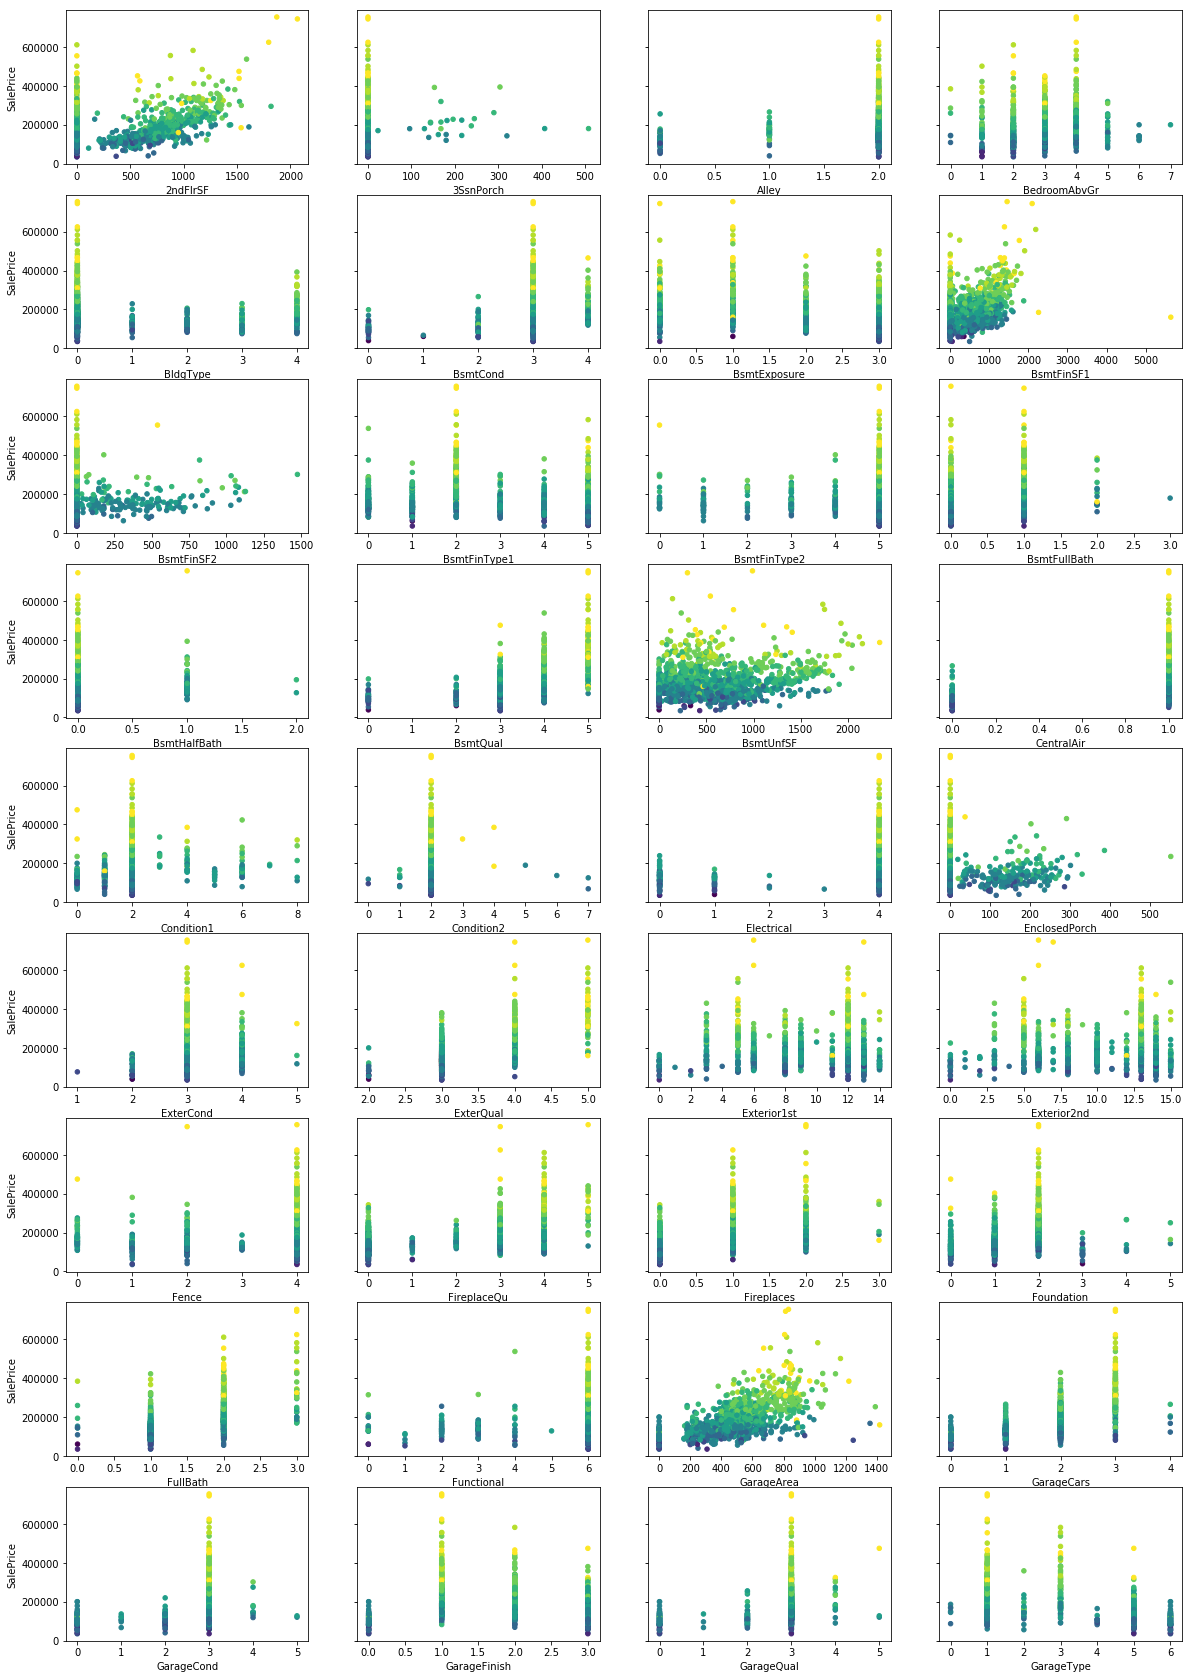

In [17]:
fig, axes = plt.subplots(ncols=4, nrows=9, figsize=(20, 30))
axes = np.ravel(axes)
col_name = df_train.corr()['SalePrice'][1:].index
for i in range(36):
    df_train.plot.scatter(ax=axes[i], x=col_name[i], 
                          y='SalePrice', c='OverallQual', 
                          sharey=True, colorbar=False, cmap='viridis')

In [18]:
df_train = df_train[df_train['TotalSF'] < 6000]
df_train = df_train[df_train['TotalBsmtSF'] < 4000]
df_train = df_train[df_train['SalePrice'] < 700000]

In [19]:
X_train = df_train.drop(['SalePrice','Id'], axis=1).values
y_train = df_train['SalePrice'].values
X_test  = df_test.drop(['Id'], axis=1).values

print(X_train.shape, y_train.shape, X_test.shape)

(1455, 83) (1455,) (1459, 83)


## Nice, now, lets import the librarys and build the model pipeline to find the best model to our problem

In [20]:
########################################################
######## IMPORTING NECESSARY MODULES AND MODELS ########
########################################################
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error #To evaluate our model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [21]:
thresh = 5 * 10**(-4)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# eval model
select_X_val = selection.transform(X_test)
# test 
select_X_test = selection.transform(X_test)

In [22]:
select_X_train.shape

(1455, 43)

Scaled_Ridge: 0.896894 (+/- 0.012399)
Scaled_Lasso: 0.854166 (+/- 0.020757)
Scaled_Elastic: 0.867744 (+/- 0.026294)
Scaled_RF_reg: 0.876783 (+/- 0.011609)
Scaled_ET_reg: 0.887964 (+/- 0.018624)
Scaled_BR_reg: 0.877906 (+/- 0.008899)
Scaled_Hub-Reg: 0.895813 (+/- 0.014700)
Scaled_BayRidge: 0.896614 (+/- 0.013101)
Scaled_XGB_reg: 0.914423 (+/- 0.008471)
Scaled_DT_reg: 0.781492 (+/- 0.048881)
Scaled_SVR: 0.880242 (+/- 0.019213)
Scaled_KNN_reg: 0.860206 (+/- 0.027876)
Scaled_ADA-Reg: 0.850775 (+/- 0.018744)
Scaled_Gboost-Reg: 0.907225 (+/- 0.009855)
Scaled_RFR_PCA: 0.863805 (+/- 0.012947)
Scaled_XGBR_PCA: 0.881209 (+/- 0.015880)


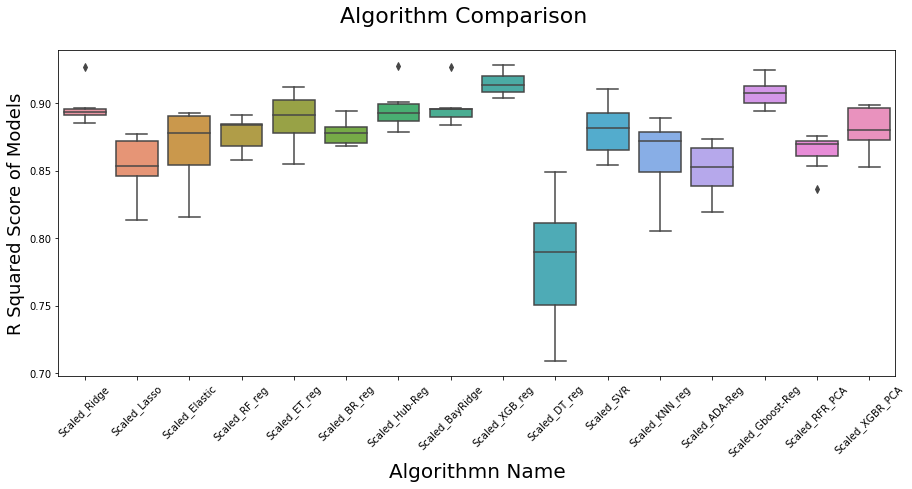

In [23]:
pipelines = []
seed = 5

pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Ridge", Ridge(random_state=seed, alpha= 0.1, tol=0.1, solver='auto' ))]
                 )))

pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Lasso", Lasso(random_state=seed, tol=0.1))]
                 )))

pipelines.append(
                ("Scaled_Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Lasso", ElasticNet(random_state=seed, tol=0.1))]
                 )))

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))]
                 )))

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))]
                 )))

pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))]
                 ))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())]
                 ))) 

pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BayesianRidge())]
                 ))) 

pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed, n_estimators=300))]
                 ))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())]
                 ))) 

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e3, degree=2))]
                 )))

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())]
                 )))
pipelines.append(
                ("Scaled_ADA-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ADA-reg", AdaBoostRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())]
                 )))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=2)),
                     ("XGB", RandomForestRegressor())]
                 )))

pipelines.append(
                ("Scaled_XGBR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=2)),
                     ("XGB", XGBRegressor())]
                 )))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, select_X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

Wow!! Excellent results. 

I will implement some of this models to find the best prediction to this competition; 


## Testing the "Featuretools" library to auto feature engineering

> importing necessary librarys

In [24]:
import featuretools as ft #importing the module
from featuretools import variable_types as vtypes # importing vtypes to classify or categoricals

### Entities and EntitySets
The first two concepts of featuretools are entities and entitysets. An entity is simply a table (or a DataFrame if you think in Pandas). An EntitySet is a collection of tables and the relationships between them. Think of an entityset as just another Python data structure, with its own methods and attributes.

In [25]:
es = ft.EntitySet("house_price") #Creating new Entityset

### Seting the type of some categorical features

In [26]:
#Seting the categorical and ordinal variables
house_variable_types = {
    'BldgType': vtypes.Categorical, 'BsmtCond': vtypes.Categorical, 'BsmtExposure': vtypes.Categorical, 
    'BsmtFinType1': vtypes.Categorical, 'BsmtFinType2': vtypes.Categorical, 'BsmtQual': vtypes.Ordinal, 
    'CentralAir': vtypes.Categorical, 'Id':vtypes.Categorical, 'Exterior2nd': vtypes.Categorical, 
    'Condition1': vtypes.Categorical, 'Condition2': vtypes.Categorical, 'Electrical': vtypes.Categorical,
    'ExterCond': vtypes.Categorical, 'ExterQual': vtypes.Ordinal, 'Exterior1st': vtypes.Categorical, 
    'Foundation': vtypes.Categorical, 'Functional': vtypes.Categorical, 'GarageCond': vtypes.Categorical, 
    'GarageFinish': vtypes.Categorical, 'GarageQual': vtypes.Ordinal, 'GarageType': vtypes.Categorical, 
    'Heating': vtypes.Categorical, 'HeatingQC': vtypes.Categorical, 'HouseStyle': vtypes.Categorical, 
    'LandContour': vtypes.Categorical, 'LandSlope': vtypes.Categorical, 'LotConfig': vtypes.Categorical, 
    'LotShape': vtypes.Categorical, 'MSZoning': vtypes.Categorical, 'MasVnrType': vtypes.Categorical, 
    'Neighborhood': vtypes.Categorical, 'PavedDrive': vtypes.Categorical,'RoofMatl': vtypes.Categorical,
    'RoofStyle': vtypes.Categorical, 'SaleCondition': vtypes.Categorical, 'SaleType': vtypes.Categorical, 
    'Street': vtypes.Categorical, 'MiscFeature': vtypes.Categorical, 'KitchenQual': vtypes.Ordinal, 
    'Utilities': vtypes.Categorical, 'OverallQual': vtypes.Ordinal, 'PoolQC': vtypes.Categorical, 
    'Alley': vtypes.Categorical, 'FireplaceQu': vtypes.Categorical
}

### Creating a new entity Id inside the created EntitySet

In [27]:
#Creating a new entity from our table (data) with Id and we will put the correct variable types
es.entity_from_dataframe(entity_id="NewFeatures",
                         dataframe=data, index="Id",
                         variable_types=house_variable_types)

Entityset: house_price
  Entities:
    NewFeatures [Rows: 2919, Columns: 85]
  Relationships:
    No relationships

In [28]:
print(data.shape)

(2919, 85)


### Creating a normalized entity to cross throught our main interest table

In [29]:
# Creating a new entity using the OverallQuality and the most correlated with our target variables
es.normalize_entity('NewFeatures', 'Quality', 'OverallQual',
                    additional_variables=['Neighborhood','GarageQual','SaleCondition',
                                          'KitchenQual','HouseStyle', 'Condition1'],
                    make_time_index=False)

Entityset: house_price
  Entities:
    NewFeatures [Rows: 2919, Columns: 79]
    Quality [Rows: 10, Columns: 7]
  Relationships:
    NewFeatures.OverallQual -> Quality.OverallQual

### Adding some interesting values 

In [30]:
# es.add_interesting_values(max_values=3)

In [31]:
feature_matrix, features = ft.dfs(entityset=es, 
                                  target_entity="NewFeatures", 
                                  max_depth=2, verbose=True)

Built 403 features
Elapsed: 00:11 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


### Ok, now let's set our X and y values 

In [32]:
feature_matrix.shape

(2919, 403)

In [33]:
#Let's drop some of outliers 
feature_matrix = feature_matrix[feature_matrix['TotalSF'] < 6000]
feature_matrix = feature_matrix[feature_matrix['TotalBsmtSF'] < 4000]

In [34]:
feature_matrix.shape

(2913, 403)

In [35]:
feature_matrix = feature_matrix.reset_index() ## I am reseting to try fix  error
feature_matrix = feature_matrix.fillna(-999) ## filling NA's 

df_train = feature_matrix[feature_matrix['set'] == 1].copy() # spliting the data into df train
df_train = df_train[feature_matrix['SalePrice'] < 700000] # EXcluding some outliers 

df_test = feature_matrix[feature_matrix['set'] == 0].copy() # spliting the data into df test

#Deleting some inutil features (SalePrice in df_test was just to better handle with the full dataset)
del df_test['SalePrice']
del df_train['set']
del df_test['set']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [36]:
## Why I got back NaN and/or inifite values? 

In [37]:
X_train = df_train.drop(['SalePrice','Id'], axis=1).values
y_train = df_train['SalePrice'].values
X_test  = df_test.drop(['Id'], axis=1).values

print(X_train.shape, y_train.shape, X_test.shape)

(1455, 401) (1455,) (1458, 401)


## Now let's use the selector in the new features

In [38]:
thresh = 5 * 10**(-5)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# eval model
select_X_val = selection.transform(X_test)
# test 
select_X_test = selection.transform(X_test)

In [39]:
print(select_X_train.shape)

(1455, 60)


Scaled_Ridge: 0.900364 (+/- 0.009332)
Scaled_Lasso: 0.885974 (+/- 0.016465)
Scaled_Elastic: 0.887028 (+/- 0.019903)
Scaled_SVR: 0.882116 (+/- 0.021715)
Scaled_RF_reg: 0.867875 (+/- 0.012630)
Scaled_ET_reg: 0.876802 (+/- 0.012510)
Scaled_BR_reg: 0.875011 (+/- 0.010531)
Scaled_Hub-Reg: 0.900782 (+/- 0.015304)
Scaled_BayRidge: 0.898126 (+/- 0.011658)
Scaled_XGB_reg: 0.906069 (+/- 0.012896)
Scaled_DT_reg: 0.780839 (+/- 0.039531)
Scaled_KNN_reg: 0.851399 (+/- 0.023341)
Scaled_ADA-Reg: 0.852178 (+/- 0.009742)
Scaled_Gboost-Reg: 0.908130 (+/- 0.011836)
Scaled_RFR_PCA: 0.854936 (+/- 0.013770)
Scaled_XGBR_PCA: 0.876400 (+/- 0.013081)


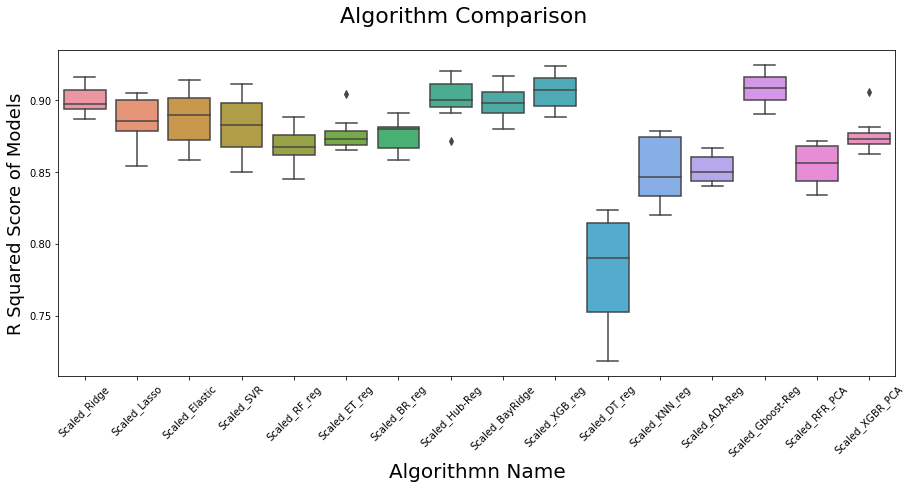

In [40]:
pipelines = []
seed = 5

pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Ridge", Ridge(random_state=seed, tol=1 ))]
                 )))

pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Lasso", Lasso(random_state=seed, tol=0.1))]
                 )))

pipelines.append(
                ("Scaled_Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Lasso", ElasticNet(random_state=seed, tol=0.1))]
                 )))

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))]
                 )))

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))]
                 )))

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))]
                 )))

pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))]
                 ))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())]
                 ))) 

pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BayesianRidge())]
                 ))) 

pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))]
                 ))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())]
                 ))) 

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())]
                 )))
pipelines.append(
                ("Scaled_ADA-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ADA-reg", AdaBoostRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())]
                 )))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=2)),
                     ("XGB", RandomForestRegressor())]
                 )))

pipelines.append(
                ("Scaled_XGBR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=2)),
                     ("XGB", XGBRegressor())]
                 )))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, select_X_train, y_train, cv= kfold,
                                 scoring=scoring)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

Cool ! I have impelemented my first featuretools solution.

Altought by now it's poorly them "normal" features, I think I can increase my auto feature engineering model. 

# IMPLEMENTING TPOT
<b>TPOT</b> is a Tree-Based Pipeline Optimization Tool (TPOT) is using genetic programming to find the best performing ML pipelines, and it is built on top of scikit-learn.

Once your dataset is cleaned and ready to be used, TPOT will help you with the
following steps of your ML pipeline:
- Feature preprocessing
- Feature construction and selection
- Model selection
- Hyperparameter optimization


In [41]:
# Importing the necessary library
from tpot import TPOTRegressor

In [42]:
tpot_config = {
    'sklearn.ensemble.GradientBoostingRegressor': {
        ''
    },

    'xgboost.XGBRegressor': {
        'alpha': [1e-3, 1e-2, 1e-1, 1., 10., 100.],
        'fit_prior': [True, False]
    },

    'sklearn.naive_bayes.MultinomialNB': {
        'alpha': [1e-3, 1e-2, 1e-1, 1., 10., 100.],
        'fit_prior': [True, False]
    }
}


<b>TPOT </b>is very user-friendly as it's similar to using scikit-learn's API:

In [43]:
# We will create our TPOT regressor with commonly used arguments
tpot = TPOTRegressor(verbosity=2, scoring='r2', cv=5,
                      n_jobs=-1, generations=8, config_dict='TPOT light',
                      population_size=30, random_state=3,
                      early_stop = 4)

In [44]:
# Fitting the auto ML model

### When we invoke fit method, TPOT will create generations of populations, seeking best

In [45]:
#fiting our tpot auto model
tpot.fit(select_X_train, y_train)

Optimization Progress:  22%|██▏       | 60/270 [02:59<1:07:15, 19.22s/pipeline]

Generation 1 - Current best internal CV score: 0.9002543050210671


Optimization Progress:  33%|███▎      | 90/270 [04:36<1:11:39, 23.89s/pipeline]

Generation 2 - Current best internal CV score: 0.9009396977661577


Optimization Progress:  44%|████▍     | 120/270 [07:03<1:24:04, 33.63s/pipeline]

Generation 3 - Current best internal CV score: 0.9020710459637538


Optimization Progress:  56%|█████▌    | 150/270 [10:27<2:24:57, 72.48s/pipeline]

Generation 4 - Current best internal CV score: 0.9020710459637538


Optimization Progress:  67%|██████▋   | 180/270 [13:23<1:16:49, 51.22s/pipeline]

Generation 5 - Current best internal CV score: 0.9020710459637538


Optimization Progress:  78%|███████▊  | 210/270 [18:06<1:16:52, 76.88s/pipeline] 

Generation 6 - Current best internal CV score: 0.9038054334479355


Optimization Progress:  89%|████████▉ | 240/270 [21:52<1:00:42, 121.40s/pipeline]

Generation 7 - Current best internal CV score: 0.9038054334479355


Generation 8 - Current best internal CV score: 0.9038054334479355

Best pipeline: RidgeCV(LinearSVR(SelectFwe(input_matrix, alpha=0.004), C=0.0001, dual=False, epsilon=1.0, loss=squared_epsilon_insensitive, tol=0.1))


TPOTRegressor(config_dict={'sklearn.linear_model.ElasticNetCV': {'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]), 'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1]}, 'sklearn.tree.DecisionTreeRegressor': {'max_depth': ...e_selection.VarianceThreshold': {'threshold': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]}},
       crossover_rate=0.1, cv=5, disable_update_check=False, early_stop=4,
       generations=8, max_eval_time_mins=5, max_time_mins=None,
       memory=None, mutation_rate=0.9, n_jobs=32, offspring_size=30,
       periodic_checkpoint_folder=None, population_size=30, random_state=3,
       scoring=None, subsample=1.0, verbosity=2, warm_start=False)

Very cool and easy to implement library!!! 

Now, let's create some predictions to submite on the competition

# Stay tuned because I will continue improving this models and implementing more details about automated librarys 